# The Best Neighborhood in Pittsburgh

## Metric
When deciding our metric we had a couple really good data sets we wanted to use but we did not really have a way they connected to one another. The data sets we had dealt with fire, parks, and students enrolled in schools. These data sets do not really correlate with one another in many ways but we really wanted to use them because the data in each was so well put together. It got to the point where we were going to try and find different data sets, until we realized that these data sets all connect with Paw Patrol when you really think about it. It sounds crazy but we are in fact talking about the children's television show with the powerful, vechile operating dogs that save lives on the daily. So, we decided that the best neighborhood in Pittsburgh would be the one that was most suitable for a Paw Patrol HQ!

![PawPatrol](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExb3ZmbHV0eHVlbTZ5aWljcWxjM3JubTY1eDN5YTlyZnU3dXN0enRlOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/p3oPGBzHUkDsjByy7x/giphy.gif)

In order to determine this we looked at 3 different data sets which included Fire Incidents, Number of students in schools, and the number of parks. After inspecting, filtering, and working with all of our data dets we were able to determine the best neighborhood in Pittsburgh and here is how we did it.

First lets set up our note book and import all of the necesary tools.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

***

# Parks

The first key factor we looked at to determine which neighborhood would be best suited for building a Paw Patrol HQ was the number of parks in a given neighborhood. We are dealing with some pretty powerful dogs here, they do a lot for the community, and they deserve a place where they can relax, chase some squirrels, and play a game of catch. What better place to do all these things than the park, so if we are going to build an HQ for these dogs they need some parks.

Lets begin by taking a look at the data set we are going to be working with.

In [66]:
data = pd.read_csv("Park_file.csv")
data.head(10)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,6,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,7,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,9,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,10,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


While looking through this data set one thing became very apparent. Not all of these places listed are parks, so what I must do is go through and filter out those places that are not considered parks because we want our dogs to have the best places to let off some steam.

In [67]:
drop_points = [] # create a list for later when we need indices of where to drop certain rows

for index, row in data.iterrows(): # itterate through each row in the data set
    if "Park" not in row['type']: 
        drop_points.append(index) # if the string "Park" is not included in the row named 'type' add the index of where that row is to our list we created earlier
        
data.drop(drop_points, inplace=True) # now go and drop the rows in 'type' where "Parks" is not included
data[['name','type','neighborhood']].head(10) # lets take a look at our updated, filtered, data set

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore
5,Allegheny Riverfront Park,Park,Central Business District
6,Alpine Gardens Park,Park,Central Northside
7,Alton Park,Park,Beechview
9,Ammon Park,Park,Bedford Dwellings
10,Arlington Park,Park,South Side Slopes


Let us now take a look at this data in the form of a graph to make it a little easier to see our front runners.

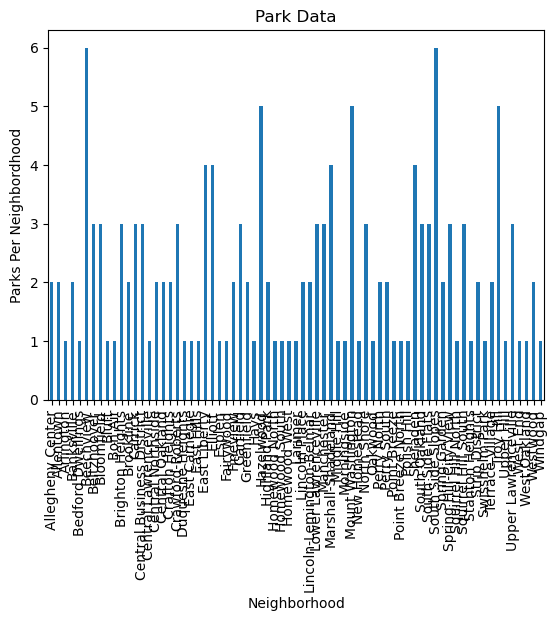

In [68]:
data["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90) 
plt.title("Park Data")
plt.xlabel("Neighborhood")
plt.ylabel("Parks Per Neighbordhood")
plt.show()

Well that that doesn't really make it easier to see who oyr front runners are, but it is clear from the graph that there are neighborhoods at the top and at the bottom of the leaderboard, so lets just look at the top ten.

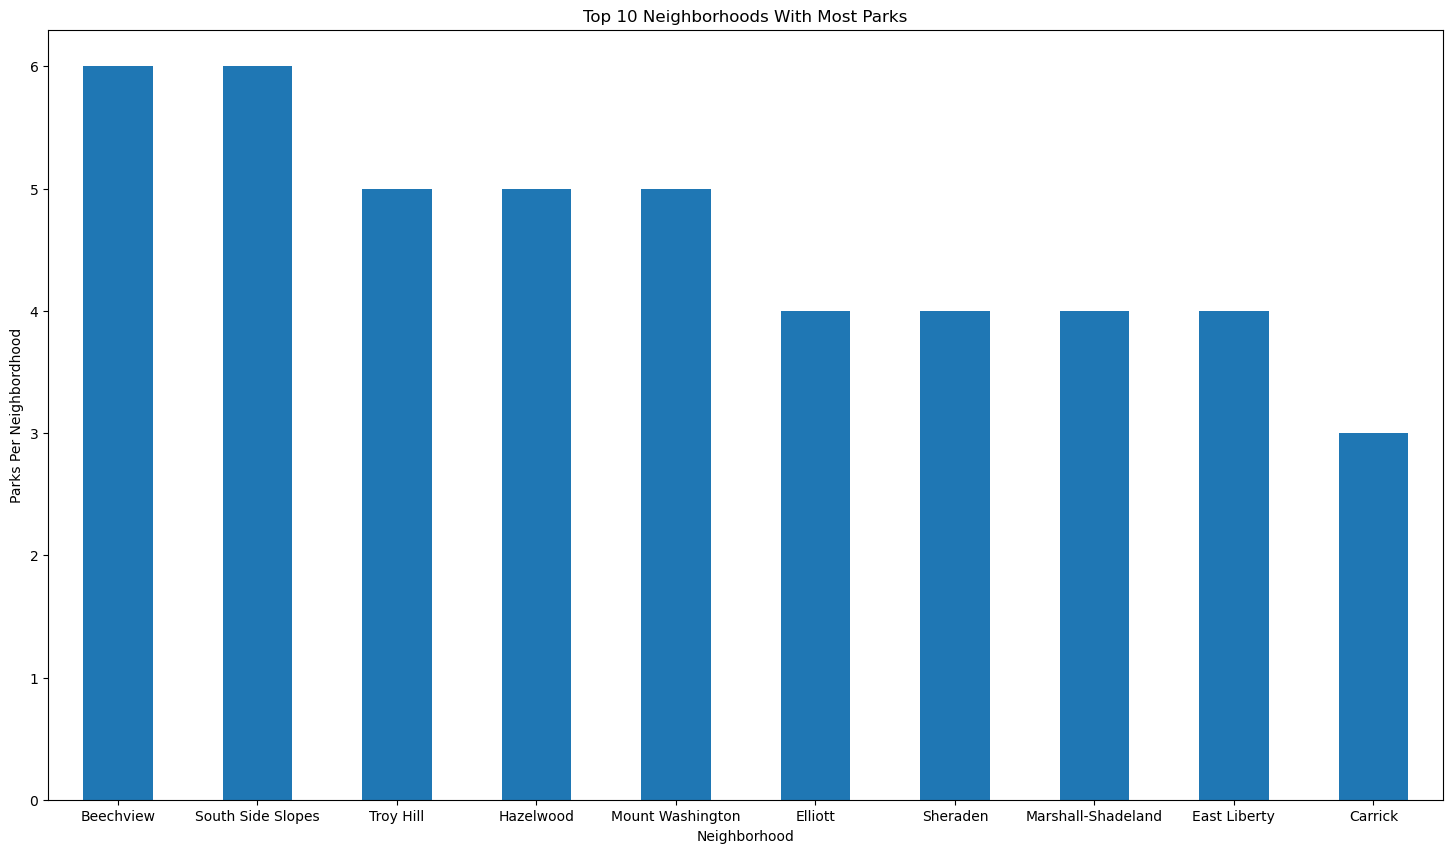

In [69]:
plt.figure(figsize=(18,10)) # adjust the size of our figures
data["neighborhood"].value_counts().sort_values(ascending = False).head(10).plot(kind='bar', rot=0) # looks at the top 10 neighborhoods
plt.title("Top 10 Neighborhoods With Most Parks")
plt.xlabel("Neighborhood")
plt.ylabel("Parks Per Neighbordhood")
plt.show()

Now that we have a good idea of which neighborhood is best, I think it is best to have a picture of where about our winner is in Pittsburgh, so let's put our data onto the map of Pittsburgh.

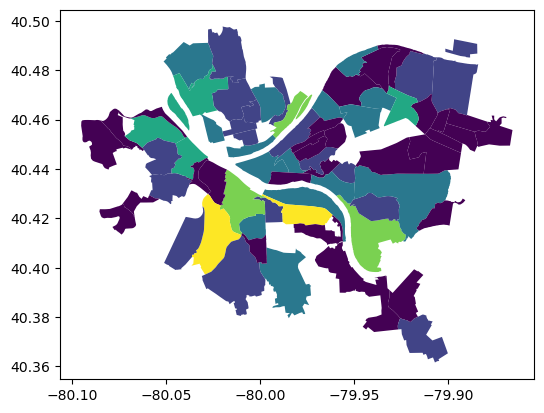

In [70]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

parks_count = data.groupby('neighborhood').size().reset_index(name = 'number_of_parks') # groups the amount of parks into an index called nummber_of_parks
parks_map = neighborhoods.merge(parks_count, how='left', left_on='hood', right_on='neighborhood') # merges the shape file and my data into one data set
parks_map[['hood','number_of_parks','geometry']]

parks_map.plot(column='number_of_parks')
plt.show()

This does a poor job of showing where the most parks are in Pittsburgh so what we need to do is add some color to our map and also a key to show which neighborhood actually has the most amount of parks.

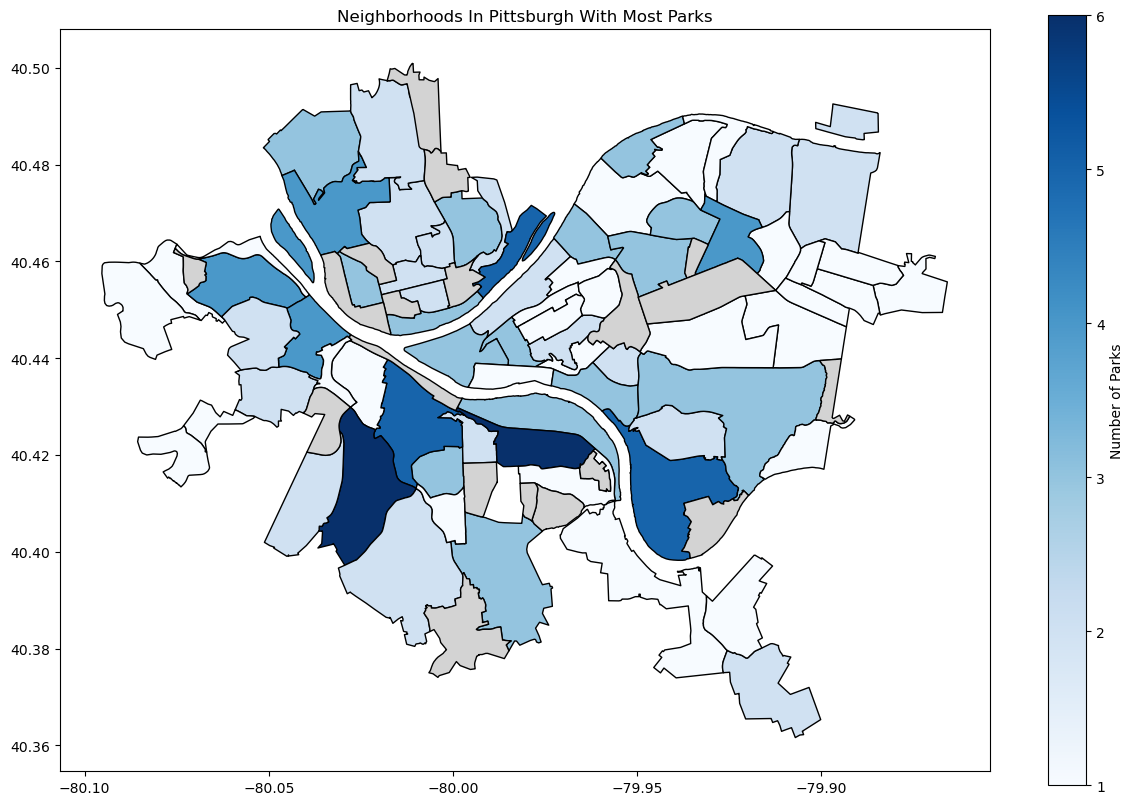

In [71]:
parks_map.plot(column='number_of_parks',cmap='Blues',edgecolor="black",
               legend=True,legend_kwds={'label': "Number of Parks"},figsize=(15, 10),missing_kwds={"color": "lightgrey"})
plt.title("Neighborhoods In Pittsburgh With Most Parks")
plt.show()

## Final Rankings - Most Parks
- There is a 2-Way tie for 1st place between **Beechview** and **South Side Slopes** ---> **6 Parks**
- There is a 3-Way tie for 2nd place between **Troy Hill**, **Hazelwood**, and **Mount Washington** ---> **5 Parks**
- There is a 4-Way tie for 3rd place between **Elliot**, **Sheraden**, **Marshall-Shadeland**, and **East Liberty** ---> **4 Parks**


![PawPatrol Celebration](https://media.giphy.com/media/tyomFRLicdpSM/giphy.gif?cid=ecf05e47cut85pgjwua2f6ycmcrwnnb1wqh2bkgwaacj3bwi&ep=v1_gifs_search&rid=giphy.gif&ct=g)   

# Personal Conclusion
The thing that surprises me about this conlcusion is that there was a two way tie between both Beechview and South Side Slopes. Being a non-Pittsburgh local, I have never really heardof these neighborhoods but me personally my favorite neighborhood is East Liberty.

---

# Fires

The second key factor we looked at to determine which neighborhood would be best suited for building a Paw Patrol HQ was the number of fires that occur in each neighborhood. These dogs are capable of doing a lot of things and one of the big things that these dogs can help with is putting out fires, so the best place for us to build a HQ would be where the most fires occur so these dogs can do the most saving.

![FireDog](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdXV1cnQ5OWpvNmtnODN2cHlyOHNtZ2FmenRnNDgxaWd3OTUwcHhhOSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/W02IjDXMcKReprLCiz/giphy.gif)

Let's begin by taking a look at the data set we are going to be working with.

In [10]:
data = pd.read_csv("FireData.csv")

pd.set_option('display.max_rows', None) # allows me to see all the rows of the data set

data[['neighborhood','alarms', 'incident_type','type_description']].head(10) # showing just most recent crime rate

,neighborhood,alarms,incident_type,type_description
0,NaN,1,111.0,Building fire
1,NaN,1,111.0,Building fire
2,NaN,0,131.0,Passenger vehicle fire
3,Fineview,0,131.0,Passenger vehicle fire
4,Fairywood,1,111.0,Building fire
5,South Side Flats,0,150.0,"Outside rubbish fire, Other"
6,Allegheny Center,1,113.0,"Cooking fire, confined to container"
7,Lincoln-Lemington-Belmar,1,111.0,Building fire
8,Carrick,1,111.0,Building fire
9,Beechview,0,131.0,Passenger vehicle fire


This is good, but there is still much work we have left to do. The next thing that we wanted to see was the different types of fire incidents. There were many different types in the data set and being able to see them all was key

In [73]:
# i want to create a list of all the different incident types
incident_types = data["type_description"].unique()
incident_list = incident_types.tolist()

print(incident_list)
# this is a big list of all the types of fires

['Building fire', 'Passenger vehicle fire', 'Outside rubbish fire, Other', 'Cooking fire, confined to container', 'Outside rubbish, trash or waste fire', 'Trash or rubbish fire, contained', 'Brush or brush-and-grass mixture fire', 'Special outside fire, Other', 'Mobile property (vehicle) fire, Other', 'Fuel burner/boiler malfunction, fire confined', 'Fires in structure other than in a building', 'Off-road vehicle or heavy equipment fire', 'Outside equipment fire', 'Fire, Other', 'Garbage dump or sanitary landfill fire', 'Dumpster or other outside trash receptacle fire', 'Grass fire', 'Chimney or flue fire, confined to chimney or flue', 'Natural vegetation fire, Other', 'Commercial Compactor fire, confined to rubbish', 'Self-propelled motor home or recreational vehicle', 'Outside storage fire', 'Construction or demolition landfill fire', 'Forest, woods or wildland fire', 'Road freight or transport vehicle fire', 'Rail vehicle fire', 'Fire in portable building, fixed location', 'Fire in 

I then wanted to create something that would be able to rank each neighborhood based on its fires. As Marshal once said prevention is key when it comes to fires. I decided to create a a function that would take the list of different fire incidents and then give a neighborhood 1 point for each time that this occurred. If it happened more than 10 times they would get 2 points for each time after that. This would allow us to see which neighborhood had the worst fire prevention/fire problem. 

In [74]:
# now take this list and create a give 1 point if it happens 1-10 times in a neighborhood and anything more than that 2 points

counts = data.groupby(["neighborhood", "incident_type"]).size().reset_index(name="count")
# this will group the 2 data columns and create a 'count' variable that I can use in a loop for the point values

# assaigning the points to each neighborhood based of the amount of occurrences
def assign_points(count):
    if 1 <= count <= 10:
        return 1
    elif count > 10:
        return 2
    else:
        return 0  
        
# creating a column named points and putting the count variable into it for the points calculated
counts["points"] = counts["count"].apply(assign_points)

# total points for each neighborhood
total_points = counts.groupby("neighborhood")["points"].sum().reset_index()

total_points.head(20)

,neighborhood,points
0,Allegheny Center,16
1,Allegheny West,12
2,Allentown,22
3,Arlington,16
4,Arlington Heights,6
5,Banksville,14
6,Bedford Dwellings,11
7,Beechview,23
8,Beltzhoover,20
9,Bloomfield,22


This was our top 20 list of the neighborhoods with fire incidents. Lets take this and organize it into a top 10 bar graph

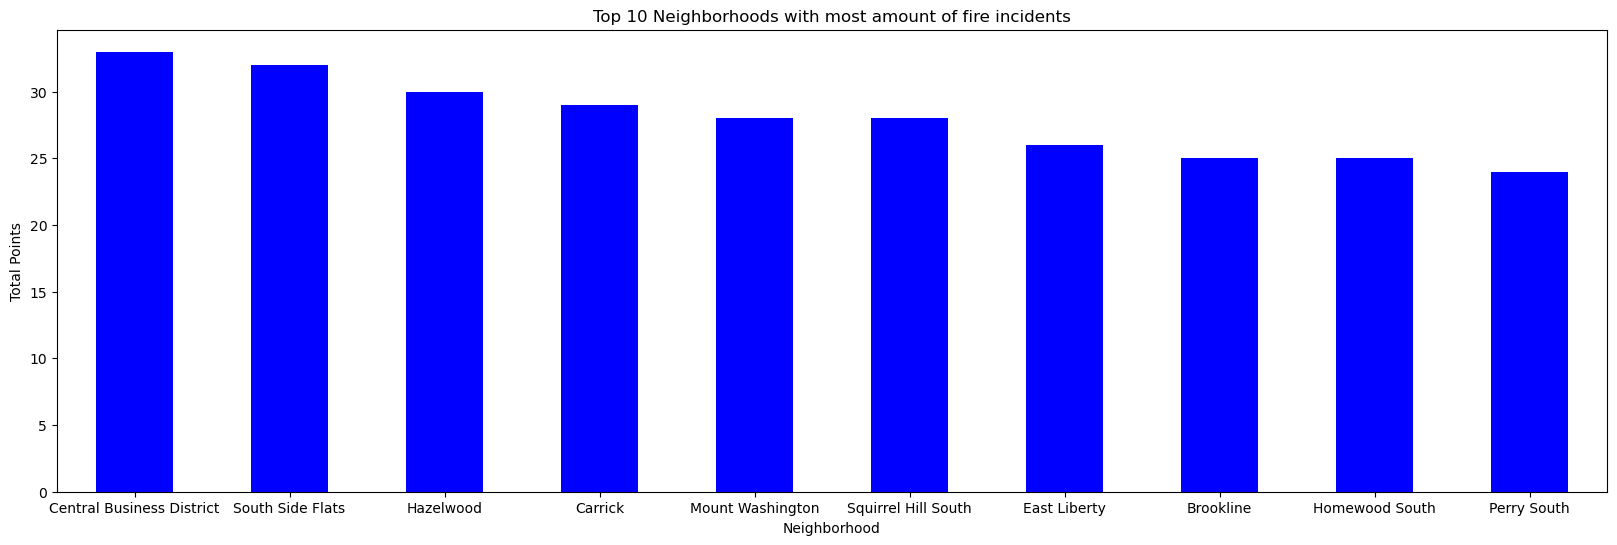

In [170]:
# now a simple bar graph to show top 10
top_10_fire = total_points[['neighborhood', 'points']].sort_values(by='points', ascending=False).head(10)

plt.figure(figsize=(20, 6))  
top_10_fire.set_index('neighborhood')['points'].plot(kind='bar', color='blue', rot = 0)


plt.title('Top 10 Neighborhoods with most amount of fire incidents')
plt.xlabel('Neighborhood')
plt.ylabel('Total Points')

plt.show()

Now we can clearly see that Central Business District (Downtown) was the neighborhood with the most fires. A lot of the others weren't too far behind which is good to note since proximity to other neighborhoods is something that we also wanted to keep in mind. So, to see this easier, we will look at this on a map 

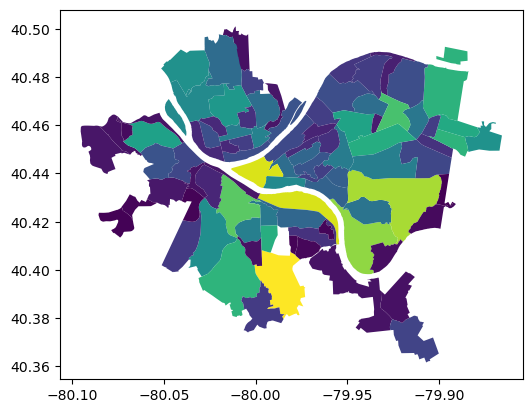

In [76]:
# now adding the map of all the neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

data = pd.read_csv("FireData.csv")

fire_count = data.groupby('neighborhood').size().reset_index(name = 'points')
fire_map = neighborhoods.merge(fire_count, how='left', left_on='hood', right_on='neighborhood')
fire_map.plot(column='points')
plt.show()


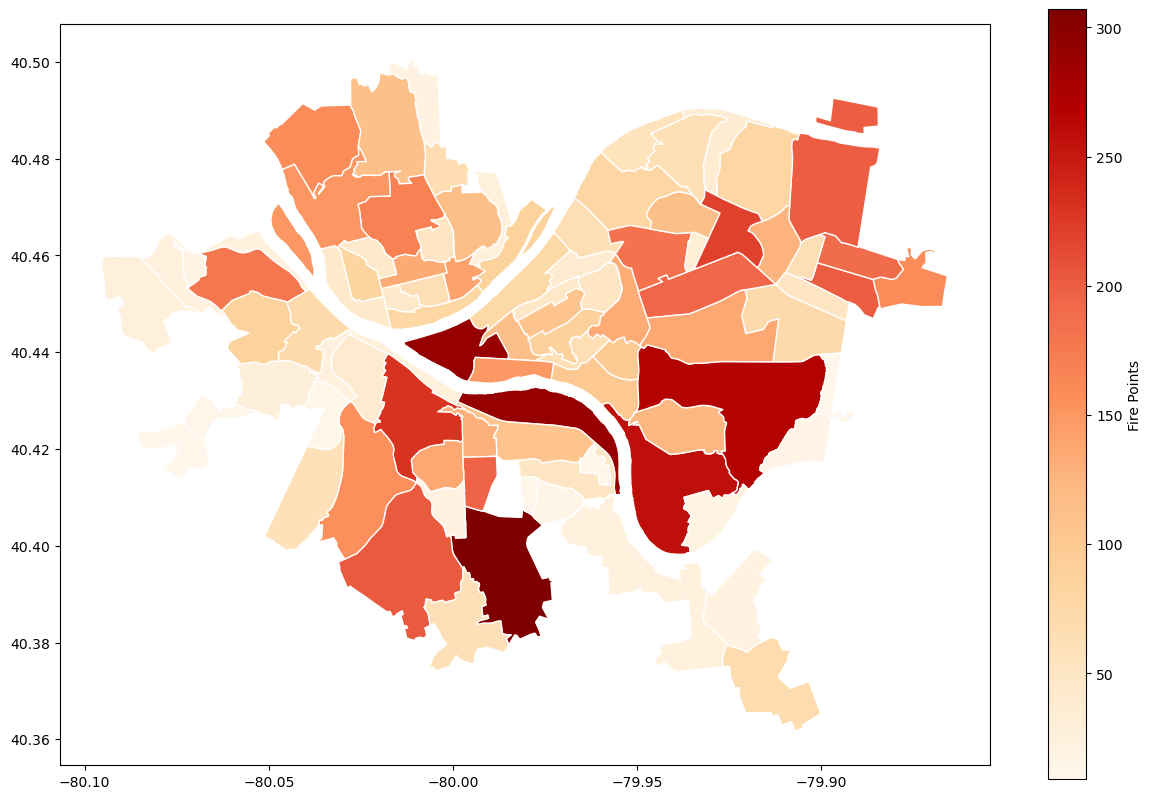

In [77]:
fire_map.plot(column='points', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Fire Points"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

## Final Rankings - Most Fires
- 1st Place: Central Business District ---> 33 Points
- 2nd Place: South Side Flats ---> 32 Points
- 3rd Place: Hazelwood ---> 30 Points

# Personal Conclusion
The fact that the Central Business District is the part of Pittsburgh with the most fires is not very surprising as this neighborhood is in the heart of the city and has many people. My favorite neighborhood in Pittsburgh is Downtown Pittsburgh which incapsulates some of the Central Business District.

---

# Schools & Community Outreach

The final key factor we looked at to determine which neighborhood would be best suited for building a Paw Patrol HQ was the number of children enrolled in school in each of these neighborhoods. With all that these dogs do for the community, we figured that it would be best if we put our HQ in a spot where many children are so that these dogs are at the heart of the action, providing safety, support, and inspiration to the younger generation on a daily basis.

Let's begin by taking a look at the data set we are going to be working with.

In [80]:
data = pd.read_csv("Schoolsdata.csv")

pd.set_option('display.max_rows', None) # allows me to see all the rows of the data set

data[['Neighborhood','Estimate; Total:']].head() # showing just most recent crime rate

,Neighborhood,Estimate; Total:
0,Allegheny Center,1389.0
1,Allegheny West,343.0
2,Allentown,2520.0
3,Arlington,1823.0
4,Arlington Heights,213.0


The Estimate; Total: column shows the total amount of kids enrolled in schools throughout the neighborhood. We want to look at this data in an easier way so let's see a bar graph

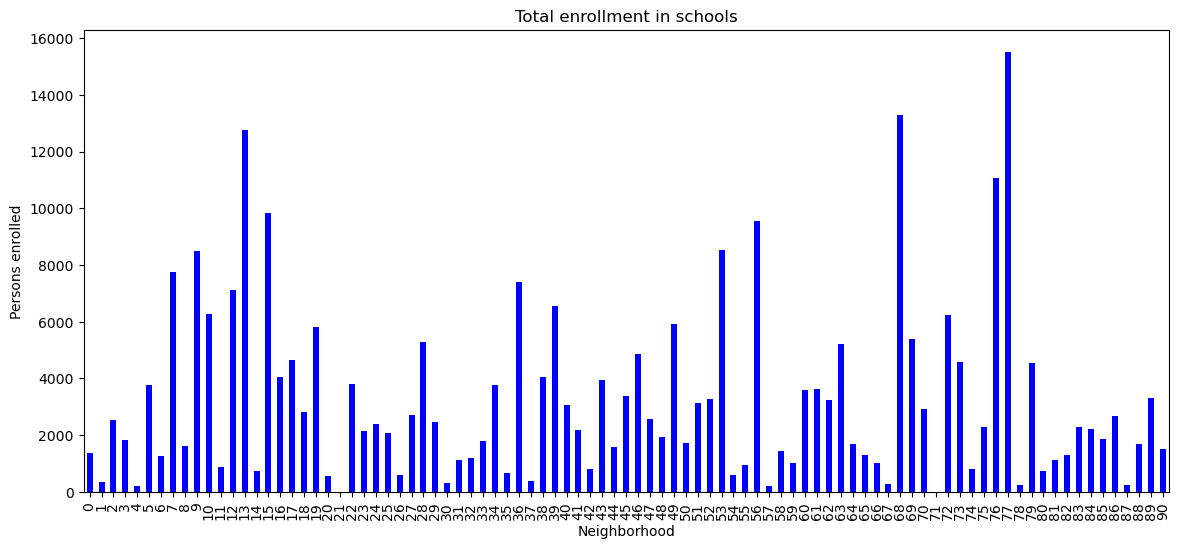

In [81]:
# creating a bar graph to determine the neighborhood with largest amount of people enrolled in schools
plt.figure(figsize=(14, 6))  # allows the graph to fit on screen 
data['Estimate; Total:'].plot(kind='bar', color='blue')

# labeling the axis and creating a title
plt.title('Total enrollment in schools')
plt.xlabel('Neighborhood')
plt.ylabel('Persons enrolled')

plt.show()

This is better but what neighborhood is number 1 and which is 23? Exactly, let's look at a top 10 so we can easily determine our winner and label each bar

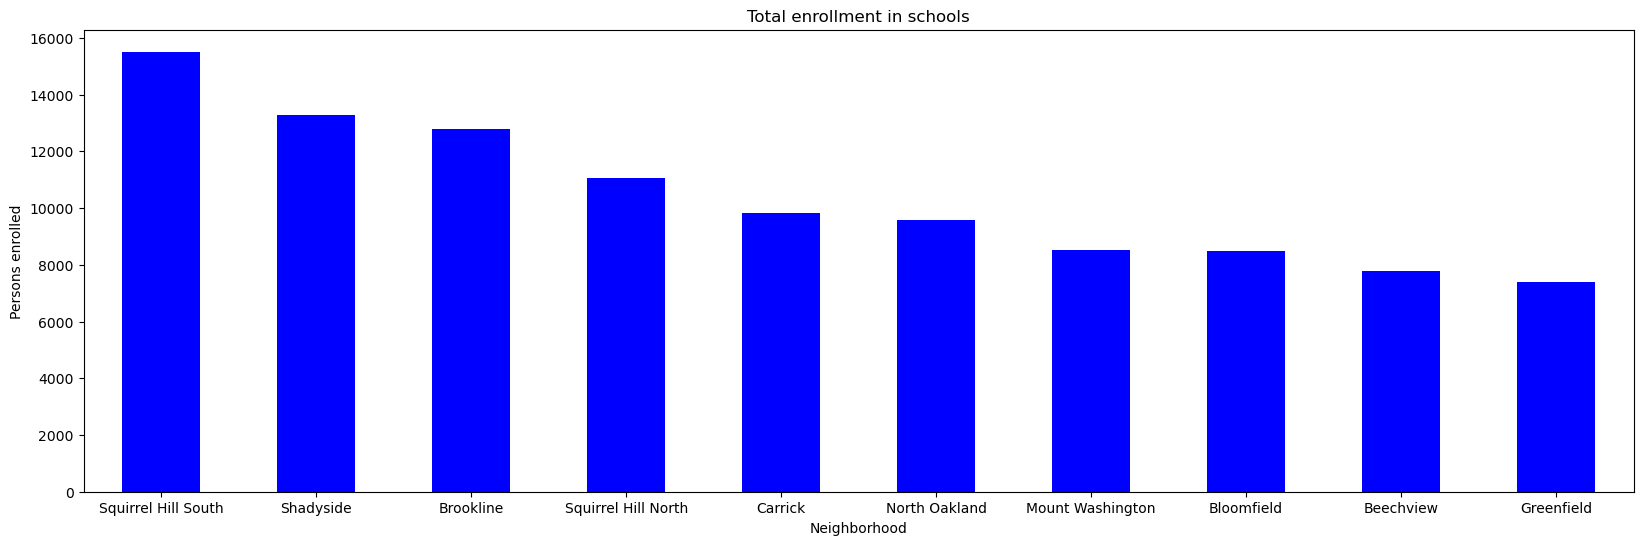

,Neighborhood,Estimate; Total:
77,Squirrel Hill South,15510.0
68,Shadyside,13290.0
13,Brookline,12777.0
76,Squirrel Hill North,11072.0
15,Carrick,9825.0


In [82]:
# now a top 10 most neighborhoods with school enrollment
top_10_enroll = data[['Neighborhood', 'Estimate; Total:']].sort_values(by='Estimate; Total:', ascending=False).head(10)
plt.figure(figsize=(20, 6)) 
top_10_enroll.set_index('Neighborhood')['Estimate; Total:'].plot(kind='bar', color='blue', rot = 0)


plt.title('Total enrollment in schools')
plt.xlabel('Neighborhood')
plt.ylabel('Persons enrolled')

plt.show()
top_10_enroll.head(5)

This is much better. Now we can see that over 15,000 kids are enrolled in schools in Squirrel Hill South. This is really good data since we can see where the dogs will get the most outreach and inspire the most amount of people

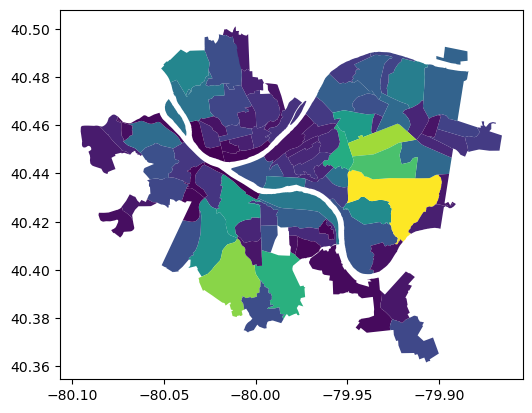

In [83]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
data = pd.read_csv("Schoolsdata.csv")

school_count = data.groupby('Neighborhood')['Estimate; Total:'].sum().reset_index()
school_map = neighborhoods.merge(school_count, how='left', left_on='hood', right_on='Neighborhood')

school_map.plot(column='Estimate; Total:')
plt.show()


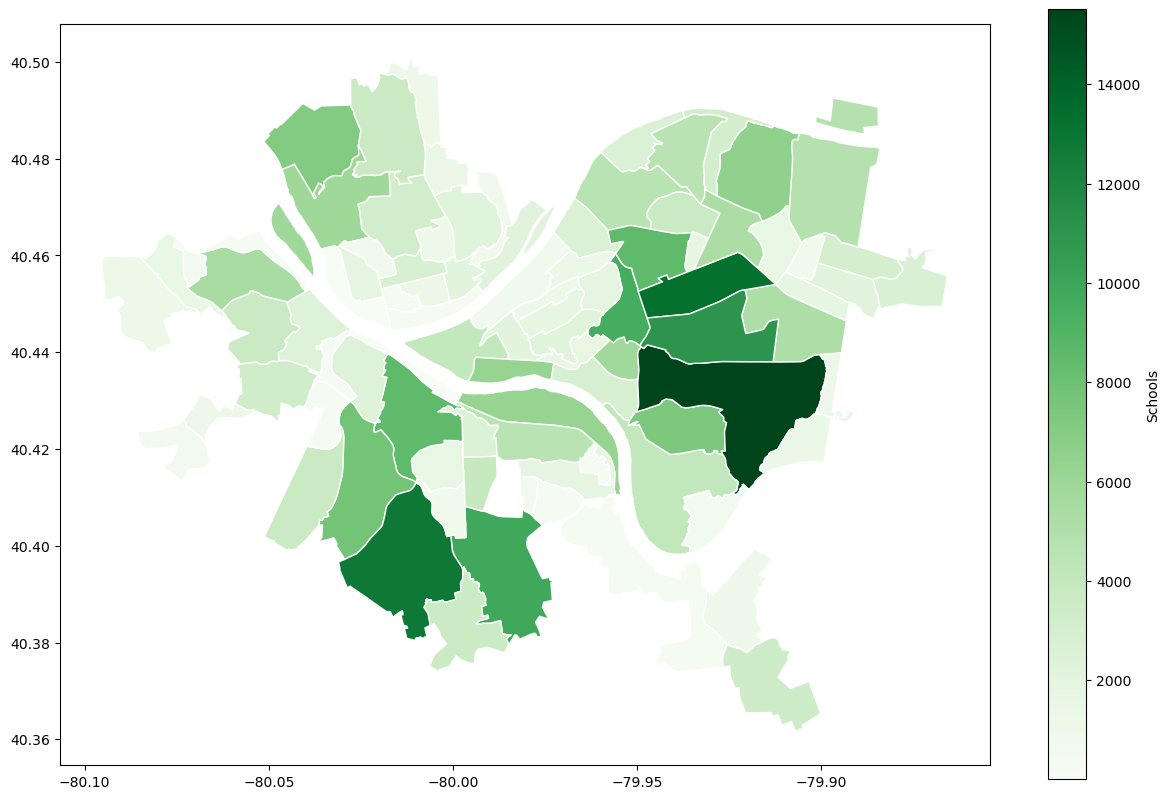

In [84]:
school_map.plot(column='Estimate; Total:', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Schools"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

## Final Rankings - Most Students Enrolled
- 1st Place: Squirrel Hill South ---> 15,510.0 Estimated Students
- 2nd Place: Shadyside ---> 13,290.0 Estimated Students
- 3rd Place: Brookline ---> 12,777.0 Estimated Students

# Personal Conclusion
Squirrel Hill South being in first place is not surprsing at all as it is a very nice place to live, so it makes perfect sense that there would be so many children living in this neighborhood. Like I previously stated my favorite neighboorhood is Downtown Pittsburgh but I have heard great things about Squirrel Hill.

---

# Adding Up The Data

We have gone through a lot of data up until now and there is a lot of information showing that a lot of different neighborhoods are pretty great places to build a Paw Patrol HQ. Now that we have all of our data we must find a way to combine all of our different data points and conclusions from each data set, combine it all into one final metric, and truly determine the best neighborhood in Pittsburgh!

We decided to normalize all of our data so that it could be on the same scale. We also wanted to give each of our different data sets a slightly different weighting. We think that safety is key so the Fire Incidents will be rated the highest at 50%. Although out dogs will love parks and their rest their job is to protect and inspire, this means that Community Outreach will be weighed at 35% and parks at 15%. We normalized our data using the Normalization Formula


![normalized](https://wallstreetmojo-files.s3.ap-south-1.amazonaws.com/2023/05/Normalization-Formula-Definition.jpg)

Here is how we did it super easily 

In [80]:
# first our park data
dataPark = pd.read_csv("Park_file.csv")

drop_points = []  # create a list for each row to remove that isnt a park

for index, row in dataPark.iterrows():  
    if "Park" not in row['type']:  # if "Park" is not in the 'type' column
        drop_points.append(index)  # add to drop list
dataPark.drop(drop_points, inplace=True) # dropping here

neighborhood_counts = dataPark['neighborhood'].value_counts()
# these 2 count and sort out new data
sorted_neighborhoods = neighborhood_counts.sort_values(ascending=False)

min_parks = sorted_neighborhoods.min()
max_parks = sorted_neighborhoods.max()

normalized_parks = (sorted_neighborhoods - min_parks) / (max_parks - min_parks)

neighborhoods_with_normalized_parks = pd.DataFrame({
    'Neighborhood': sorted_neighborhoods.index,
    'Park Count': sorted_neighborhoods.values,
    'Normalized Park Count': normalized_parks.values
})

print(neighborhoods_with_normalized_parks.head(10))  # 

         Neighborhood  Park Count  Normalized Park Count
0           Beechview           6                    1.0
1   South Side Slopes           6                    1.0
2           Troy Hill           5                    0.8
3           Hazelwood           5                    0.8
4    Mount Washington           5                    0.8
5             Elliott           4                    0.6
6            Sheraden           4                    0.6
7  Marshall-Shadeland           4                    0.6
8        East Liberty           4                    0.6
9             Carrick           3                    0.4


Next we will normalize our Fire Data using the same method

In [90]:
dataFire = pd.read_csv("FireData.csv")

counts = data.groupby(["neighborhood", "incident_type"]).size().reset_index(name="count")

def assign_points(count): # function to add points for amounts of fires
    if 1 <= count <= 10:
        return 1
    elif count > 10:
        return 2
    else:
        return 0

counts["points"] = counts["count"].apply(assign_points)

total_points = counts.groupby("neighborhood")["points"].sum().reset_index()

# getting our mins and maxes for normalization
min_points = total_points["points"].min()
max_points = total_points["points"].max()

# normalizing
total_points["normalized_points"] = (total_points["points"] - min_points) / (max_points - min_points)

print(total_points.head(10)) 

        neighborhood  points  normalized_points
0   Allegheny Center      16           0.413793
1     Allegheny West      12           0.275862
2          Allentown      22           0.620690
3          Arlington      16           0.413793
4  Arlington Heights       6           0.068966
5         Banksville      14           0.344828
6  Bedford Dwellings      11           0.241379
7          Beechview      23           0.655172
8        Beltzhoover      20           0.551724
9         Bloomfield      22           0.620690


and finally our schools and community our reach

In [100]:
dataSchool = pd.read_csv("Schoolsdata.csv")

total_enrollment = dataSchool.groupby("Neighborhood")["Estimate; Total:"].sum().reset_index()

# sorting the data in a top 10
sorted_enrollment = total_enrollment.sort_values(by="Estimate; Total:", ascending=False).head(10)

# getting minx and max for normalizing
min_enrollment = sorted_enrollment["Estimate; Total:"].min()
max_enrollment = sorted_enrollment["Estimate; Total:"].max()

sorted_enrollment["normalized_enrollment"] = (sorted_enrollment["Estimate; Total:"] - min_enrollment) / (max_enrollment - min_enrollment)

print(sorted_enrollment)




           Neighborhood  Estimate; Total:  normalized_enrollment
77  Squirrel Hill South           15510.0               1.000000
68            Shadyside           13290.0               0.726196
13            Brookline           12777.0               0.662926
76  Squirrel Hill North           11072.0               0.452639
15              Carrick            9825.0               0.298841
56        North Oakland            9565.0               0.266774
53     Mount Washington            8525.0               0.138505
9            Bloomfield            8498.0               0.135175
7             Beechview            7770.0               0.045387
36           Greenfield            7402.0               0.000000


In [118]:
# park Data --------------------------------------------------------
dataPark = pd.read_csv("Park_file.csv")

# drop not parks in set
drop_points = []  
for index, row in dataPark.iterrows():  
    if "Park" not in row['type']:  
        drop_points.append(index)  
dataPark.drop(drop_points, inplace=True) 

# count and sort parks by neighborhood
neighborhood_counts = dataPark['neighborhood'].value_counts()
sorted_neighborhoods = neighborhood_counts.sort_values(ascending=False)

# normalize park counts
min_parks = sorted_neighborhoods.min()
max_parks = sorted_neighborhoods.max()
normalized_parks = (sorted_neighborhoods - min_parks) / (max_parks - min_parks)

# 
neighborhoods_with_normalized_parks = pd.DataFrame({
    'Neighborhood': sorted_neighborhoods.index,
    'Park Count': sorted_neighborhoods.values,
    'Normalized Park Count': normalized_parks.values
})

# fire Data --------------------------------------------------------
dataFire = pd.read_csv("FireData.csv")

counts = dataFire.groupby(["neighborhood", "incident_type"]).size().reset_index(name="count")

# function to assign points based on fire count
def assign_points(count): 
    if 1 <= count <= 10:
        return 1
    elif count > 10:
        return 2
    else:
        return 0

counts["points"] = counts["count"].apply(assign_points)

# group by neighborhood and sum points up
total_points = counts.groupby("neighborhood")["points"].sum().reset_index()

# normalize fire data points
min_points = total_points["points"].min()
max_points = total_points["points"].max()
total_points["normalized_points"] = (total_points["points"] - min_points) / (max_points - min_points)

# schools Data --------------------------------------------------------
dataSchool = pd.read_csv("Schoolsdata.csv")

total_enrollment = dataSchool.groupby("Neighborhood")["Estimate; Total:"].sum().reset_index()

sorted_enrollment = total_enrollment.sort_values(by="Estimate; Total:", ascending=False)

# normalize the enrollment data
min_enrollment = sorted_enrollment["Estimate; Total:"].min()
max_enrollment = sorted_enrollment["Estimate; Total:"].max()
sorted_enrollment["normalized_enrollment"] = (sorted_enrollment["Estimate; Total:"] - min_enrollment) / (max_enrollment - min_enrollment)

# merge all datasets on the neighborhood column
merged_data = neighborhoods_with_normalized_parks.merge(total_points, how='left', left_on='Neighborhood', right_on='neighborhood')
merged_data = merged_data.merge(sorted_enrollment, how='left', left_on='Neighborhood', right_on='Neighborhood')

# Fire Incidents = 50% weight, Community Outreach = 35%, Parks = 15%

merged_data['weighted_score'] = (
    merged_data['normalized_points'] * 0.50 + 
    merged_data['normalized_enrollment'] * 0.35 + 
    merged_data['Normalized Park Count'] * 0.15
)

# sort neighborhoods by the weighted score in high-to-low order and get the top 10
top_10_neighborhoods = merged_data.sort_values(by='weighted_score', ascending=False).head(10)

print(top_10_neighborhoods[['Neighborhood', 'Normalized Park Count', 'normalized_points', 'normalized_enrollment', 'weighted_score']].to_string(index=False))


             Neighborhood  Normalized Park Count  normalized_points  normalized_enrollment  weighted_score
      Squirrel Hill South                    0.4           0.827586               1.000000        0.823793
         Mount Washington                    0.8           0.827586               0.549558        0.726138
                  Carrick                    0.4           0.862069               0.633391        0.712721
         South Side Flats                    0.4           0.965517               0.402850        0.683756
                Brookline                    0.2           0.724138               0.823757        0.680384
                Hazelwood                    0.8           0.896552               0.261817        0.659912
                Beechview                    1.0           0.655172               0.500871        0.652891
Central Business District                    0.4           1.000000               0.260141        0.651049
             East Liberty            

# Conclusion

Final top 5 based on weight and normalized scores:


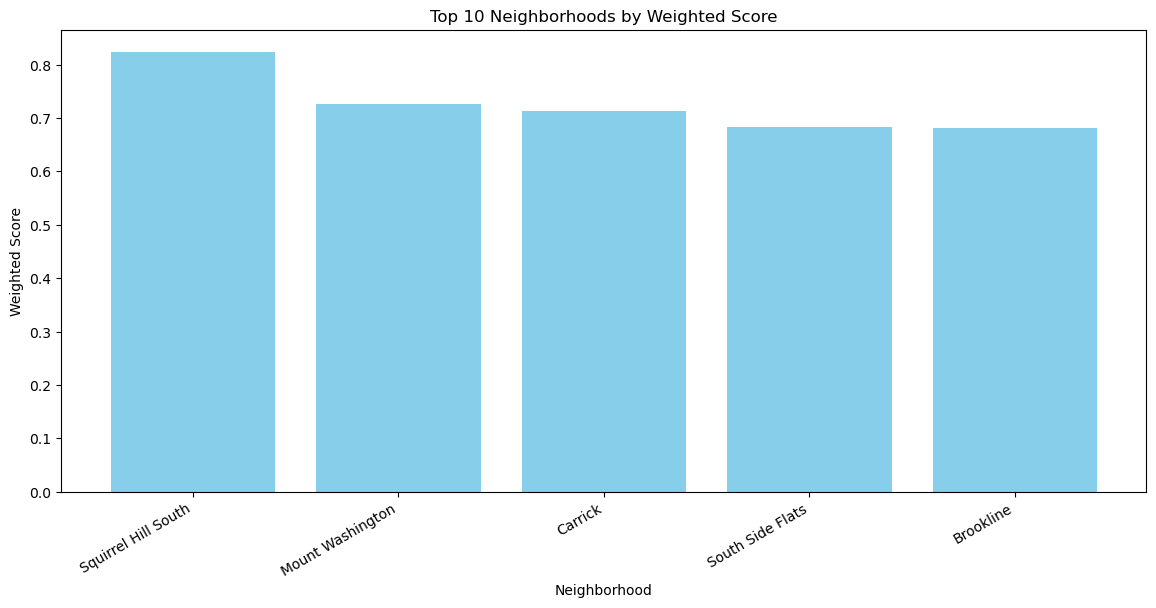

In [148]:
plt.figure(figsize=(14, 6))
top_5 = top_10_neighborhoods.head(5)
plt.bar(top_5['Neighborhood'], top_5['weighted_score'], color='skyblue')

plt.title('Top 10 Neighborhoods by Weighted Score')
plt.xlabel('Neighborhood')
plt.ylabel('Weighted Score')

plt.xticks(rotation=30, ha='right')

plt.show()

# Conclusion

After analyzing the data we gained valuable information on our question - the best neighborhood in Pittsburgh. It took a lot of time and effort to figure out how we wanted to combine all of our data into one finite answer, but after filtering, normalizing, and weighting our data we were able to conclude that **Squirrel Hill South** is the best neighborhood in Pittsburgh. This was a shocking result because after looking back through the data and in the individual results from the individual data sets Squirrel Hill South wasn't in the top 5 in most of the data sets. But after normalizing the data and most importantly adding the weights it came out on top. This final result did not really surprise us in the slightest because Squirrel Hill South is an amazing place to live filled with everything that crime fighting, vehicle operating, and talking dogs need to live wonderful, very exciting lives. 

![Dog](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExbDNiM3gyeWttZGlmeTl6MjVjenRuZWR2YnV0amJ5NGIzOHg2MTFrOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Avnh1afepo0qrhCUEy/giphy.gif)